# <font color="gren">**Exercício 8**

## **1-Imports Necessários**

In [326]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d
from scipy import sparse
import math

## **2-Definição da função $f(x)$ a calcularmos a derivada**


In [327]:
def f(x):
    return(x * np.exp(-x) * np.cos(2*x))

## **3-Definição da função que calcula $f_a'(x)$**
*(derivação central aproximada)*

### a)Diferrença finita adiantada

In [328]:
def deriv_f_ffd(h,f,x):
    return ((f(x+h) - f(x))/h)

### b)Diferença finita atrasada

In [329]:
def deriv_f_bfd(h,f,x):
    return ((f(x) - f(x-h))/h)

### c)Diferença finita centrada

In [330]:
def deriv_f_cfd(h,f,x):
    return ((f(x+h) - f(x-h))/(2*h))

## **4-Definição da função que calcula $f'(x)$**
*( valor exato para o caso de $f(x)$ do exercício 8 )*

In [331]:
def deriv_f(x):
    return( np.exp(-x)*( np.cos(2*x) - x*( np.cos(2*x) + 2*np.sin(2*x) ) ) )

# **<font color='gren'>8-a)**

In [332]:
#   Vetor de valores de x a serem considerados
lenx=100
x=np.linspace(0,math.pi,lenx)

#   Vetor de derivadas exatas:
deriv_function=np.zeros(lenx)
for i in range (0,lenx):
    deriv_function[i]=deriv_f(x[i])

*Plot de resultados*

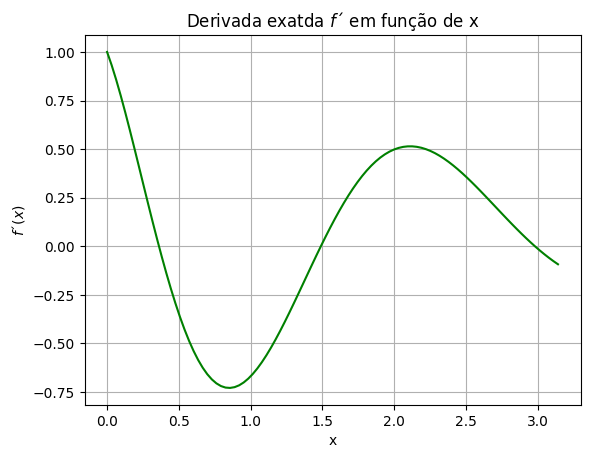

In [333]:
plt.plot(x,deriv_function,'-g')
plt.grid()
plt.title('Derivada exatda $f´$ em função de x')
plt.xlabel('x')
plt.ylabel('$f´(x)$')
plt.show()

# **<font color='gren'>8-b)**

In [334]:

#   Vetor de valores de x a serem considerados
lenx=100
x=np.linspace(0,math.pi,lenx)
h=np.array([0.2,0.1,0.05,0.025])
lenh=len(h)

#   Vetores de derivadas aproximadas:
#a)Usando diferença finita adiantada
deriv_function_ffd=np.zeros(shape=(lenh,lenx),dtype=np.float64)
for i in range (0,lenh):
    for j in range(0,lenx):
        deriv_function_ffd[i][j]=deriv_f_ffd(h[i],f,x[j])# a=1 b=10, N=100, f=f(x) x=x[i]

#b)Usando diferença finita atrasada
deriv_function_bfd=np.zeros(shape=(lenh,lenx),dtype=np.float64)
for i in range (0,lenh):
    for j in range(0,lenx):
        deriv_function_bfd[i][j]=deriv_f_bfd(h[i],f,x[j])

#c)Usando diferença finita centrada
deriv_function_cfd=np.zeros(shape=(lenh,lenx),dtype=np.float64)
for i in range (0,lenh):
    for j in range(0,lenx):
        deriv_function_cfd[i][j]=deriv_f_cfd(h[i],f,x[j])

*a)Plot para diferença finita adiantada*

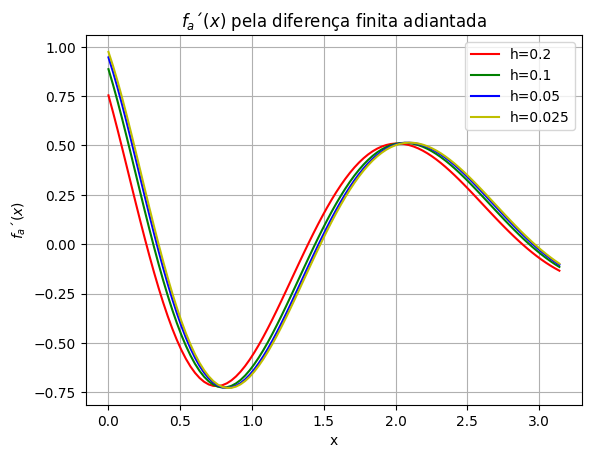

In [335]:
plt.plot(x,deriv_function_ffd[0],'-r',
         x,deriv_function_ffd[1],'-g',
         x,deriv_function_ffd[2],'-b',
         x,deriv_function_ffd[3],'-y')
plt.grid()
plt.legend(['h=0.2','h=0.1','h=0.05','h=0.025'])
plt.xlabel('x')
plt.ylabel('$f_a´(x)$')
plt.title('$f_a´(x)$ pela diferença finita adiantada')
plt.show()

*b)Plot para diferença finita atrasada*

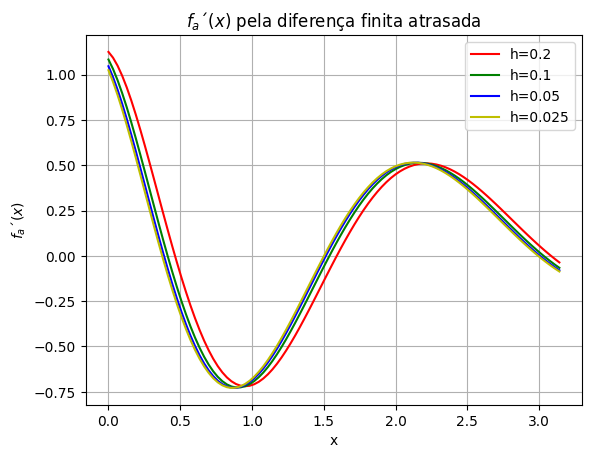

In [336]:
plt.plot(x,deriv_function_bfd[0],'-r',
         x,deriv_function_bfd[1],'-g',
         x,deriv_function_bfd[2],'-b',
         x,deriv_function_bfd[3],'-y')
plt.grid()
plt.legend(['h=0.2','h=0.1','h=0.05','h=0.025'])
plt.xlabel('x')
plt.ylabel('$f_a´(x)$')
plt.title('$f_a´(x)$ pela diferença finita atrasada')
plt.show()

*c)Plot para diferença finita centrada*

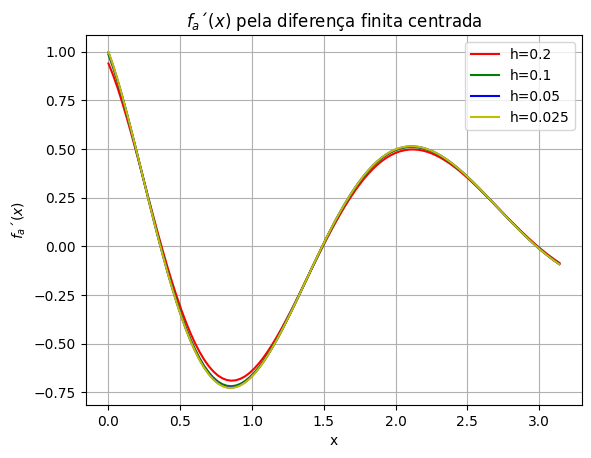

In [337]:
plt.plot(x,deriv_function_cfd[0],'-r',
         x,deriv_function_cfd[1],'-g',
         x,deriv_function_cfd[2],'-b',
         x,deriv_function_cfd[3],'-y')
plt.grid()
plt.legend(['h=0.2','h=0.1','h=0.05','h=0.025'])
plt.xlabel('x')
plt.ylabel('$f_a´(x)$')
plt.title('$f_a´(x)$ pela diferença finita centrada')
plt.show()

# **<font color='gren'>8-c)**

In [338]:

#   Obtenção do vetor de valores de h
lenh=11
k=np.linspace(0,10,lenh,dtype=int)
h=np.zeros(lenh)
for i in range(0,lenh):
    h[i]=0.25/(10**(k[i]))

#   Valor da derivada exata de f em x
val=deriv_f((math.pi)/2)

#   Vetores de erros das derivadas aproximadas
error_ffd=np.zeros(lenh)
error_cfd=np.zeros(lenh)
for i in range(0,lenh):
    error_ffd[i]=abs(deriv_f_ffd(h[i],f,x=(math.pi)/2)-val)
    error_cfd[i]=abs(deriv_f_cfd(h[i],f,x=(math.pi)/2)-val)
  


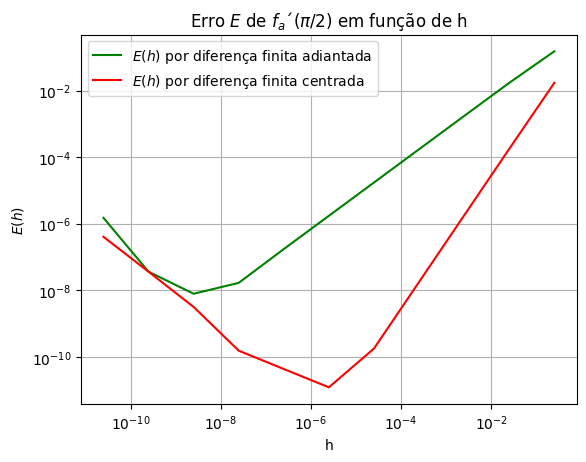

In [339]:
plt.loglog(h,error_ffd,'g',
           h,error_cfd,'r')
plt.grid()
plt.title('Erro $E$ de $f_a´(\pi/2)$ em função de h')
plt.xlabel('h')
plt.ylabel('$E(h)$')
plt.legend(['$E(h)$ por diferença finita adiantada','$E(h)$ por diferença finita centrada'])
plt.show()



OBS: quando h é muito pequeno, também ocorre um aumento do crescimento erro, mostrando que há uma faixa de valores na qual o uso de h é mais viável

# **<font color='gren'>8-d)**

### **Definição da função que calcula $f''(x)$**
*( valor exato para o caso de $f(x)$ do exercício 8 )*

In [340]:
def sderiv_f(x):
    return( np.exp(-x)*( 4*np.sin(2*x)*(x - 1) - np.cos(2*x)*(3*x + 2) ) ) 

### **Definição da função que calcula $f_a''(x)$**

*(derivada de segundo grau aproximada em x)*

In [341]:
def sderiv_fa(h,f,x):
    return( ( f(x+h) - 2*f(x) + f(x-h) )/(h**2) )

### **Cálculo do vetor de erros**

In [342]:
#   Obtenção do vetor de valores de h
lenh=11
k=np.linspace(0,10,lenh,dtype=int)
h=np.zeros(lenh)
for i in range(0,lenh):
    h[i]=0.25/(10**(k[i]))

#   Valor da derivada exata de f em x=pi/2
val=sderiv_f((math.pi)/2)

#   Vetores de erros das derivadas aproximadas
error_fa=np.zeros(lenh)
for i in range(0,lenh):
    error_fa[i]=abs(sderiv_fa(h[i],f,x=(math.pi)/2)-val)
  

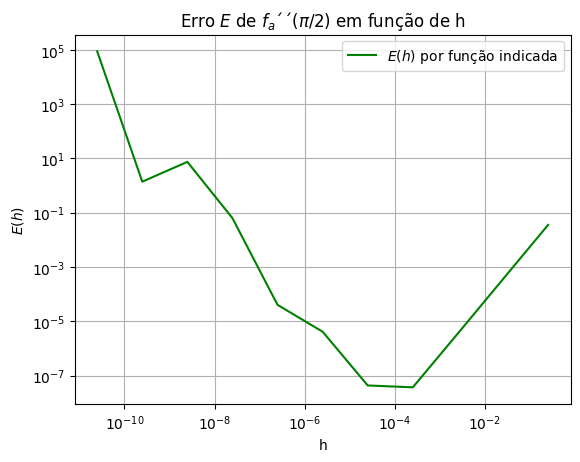

In [343]:
plt.loglog(h,error_fa,'g',)
plt.grid()
plt.title('Erro $E$ de $f_a´´(\pi/2)$ em função de h')
plt.xlabel('h')
plt.ylabel('$E(h)$')
plt.legend(['$E(h)$ por função indicada','$E(h)$ por diferença finita centrada'])
plt.show()

